In [1]:
import plotly.graph_objects as go
import plotly.express as px
import pandas
import numpy as np
from sklearn.linear_model import LinearRegression #Machine learning Library for linear regression
from patsy import dmatrices #Like R lesgo
import statsmodels.api as sm #summary function
from statsmodels.stats.outliers_influence import variance_inflation_factor #Para la funcion Vif() de R
from statsmodels.stats.anova import anova_lm #La funciona nova en si
from statsmodels.formula.api import ols #Para que funcione el anova

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



*1.1*. Realizar el Laboratorio de la sección 3.6 del libro “An Introduction to Statistical Learning with
Applications in R” de Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani, realice los
ejercicios de regresión lineal simple (3.6.2). Muestre imágenes de la respuesta en consola y redacte
sus observaciones y conclusiones acerca de cada ejercicio (colocar las imágenes en su reporte).

In [2]:
# Loading boston housing dataset. Downloaded from: https://www.kaggle.com/puxama/bostoncsv 
dataset = pandas.read_csv("./Boston.csv")
print(dataset.columns)

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [3]:
y, X = dmatrices('medv ~ lstat', data=dataset, return_type='dataframe')
model = sm.OLS(y,X)
model = model.fit()    # fitting the model
print(model.summary()) # as summary(fitted_model) function in R
model.params
model.conf_int()       # as confint(fitted_model) function in R
prediction = model.predict(X)  # computing prediction
print(prediction) # printing prediction 
'''
Plotting medv with respect of lstat and Drawing the built model line
'''
# Preparing Data to plot
x_mock = np.array([[1,0],[1,40]]) # the input to the built model requieres to be a pair with a number 1 as first element.
y_mock = model.predict(x_mock)
x_mock = x_mock[:,1] 
x_tr = dataset.iloc[1:,12:13].to_numpy() # lstat column without header 
y_tr = dataset.iloc[1:,13:14].to_numpy() # medv column without header
x_tr = x_tr.flatten() # shape (505,1) -> (505,)
y_tr = y_tr.flatten() # shape (505,1) -> (505,)

# Declaring traces
line_trace = go.Scatter(x=x_mock,
                        y=y_mock,
                        mode="lines",
                        name="lines")
marker_trace = go.Scatter(x=x_tr, y=y_tr,
                          mode='markers',name="markers")
# Declaring Figure, adding traces and showing the graph
fig = go.Figure(data=[marker_trace,line_trace])
fig.show()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           5.08e-88
Time:                        04:03:56   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

1.2. Realice los ejercicios correspondientes a regresión lineal múltiple (3.6.3). Muestre imágenes de la
respuesta en consola y redacte sus observaciones y conclusiones acerca de cada ejercicio, así como
de las gráficas obtenidas (colocar las imágenes en su reporte).


In [4]:
y, X = dmatrices('medv ~ lstat + age', data=dataset, return_type='dataframe')
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           2.98e-88
Time:                        04:03:57   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [5]:
y, X = dmatrices('medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat', data=dataset, return_type='dataframe')

mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          6.72e-135
Time:                        04:03:57   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [6]:
vif = pandas.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Predictores'] = X.columns
vif.round(1)

,VIF Factor,Predictores
0,585.3,Intercept
1,1.8,crim
2,2.3,zn
3,4.0,indus
4,1.1,chas
5,4.4,nox
6,1.9,rm
7,3.1,age
8,4.0,dis
9,7.5,rad


In [7]:
#Remove age predictor, because it has a high p-value
y, X = dmatrices('medv ~ crim + zn + indus + chas + nox + rm  + dis + rad + tax + ptratio + black + lstat', data=dataset, return_type='dataframe')

mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          6.08e-136
Time:                        04:03:58   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.0

1.3. Realice los ejercicios correspondientes a la interacción de términos (3.6.4). Muestre imágenes de la
respuesta en consola y redacte sus observaciones y conclusiones acerca de cada ejercicio, así como
de las gráficas obtenidas (colocar las imágenes en su reporte).

In [8]:
y, X = dmatrices('medv ~ lstat*age', data=dataset, return_type='dataframe')
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           4.86e-88
Time:                        04:03:58   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

1.4. Realice los ejercicios correspondientes a las transformaciones no lineales de los predictores (3.6.5).
Muestre imágenes de la respuesta en consola y redacte sus observaciones y conclusiones acerca de
cada ejercicio, así como de las gráficas obtenidas (colocar las imágenes en su reporte)

In [9]:
y, X = dmatrices("medv ~ lstat + np.power(lstat,2)", data=dataset, return_type='dataframe')
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          1.56e-112
Time:                        04:03:58   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0

In [10]:
#y, X = dmatrices('medv ~ lstat*age', data=dataset, return_type='dataframe')
model_fit_1 = ols('medv ~ lstat', data=dataset).fit()
model_fit_2 = ols('medv ~ lstat + np.power(lstat,2)', data=dataset).fit()
table = anova_lm(model_fit_1,model_fit_2)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



In [11]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit_2.fittedvalues

# model residuals
model_residuals = model_fit_2.resid

# normalized residuals
model_norm_residuals = model_fit_2.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit_2.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit_2.get_influence().cooks_distance[0]


In [12]:
# Importing the hard good stuff 4 plotting
from statsmodels.graphics.gofplots import ProbPlot
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



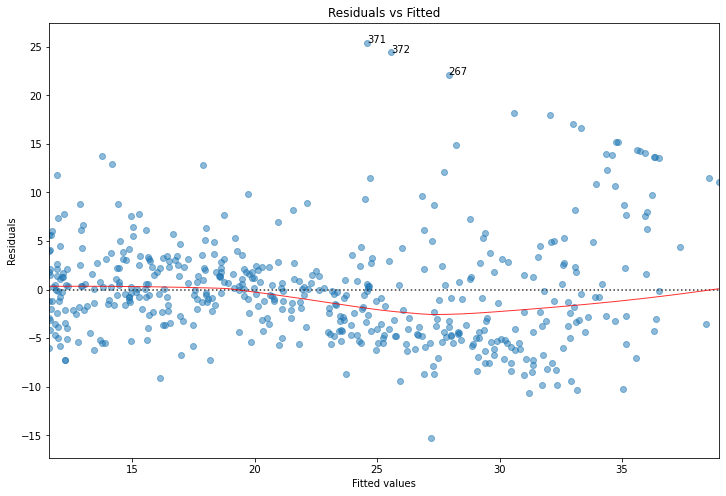

In [13]:

'''
PLOTTING RESIDUAL GRAPH
'''
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'medv', data=dataset,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));


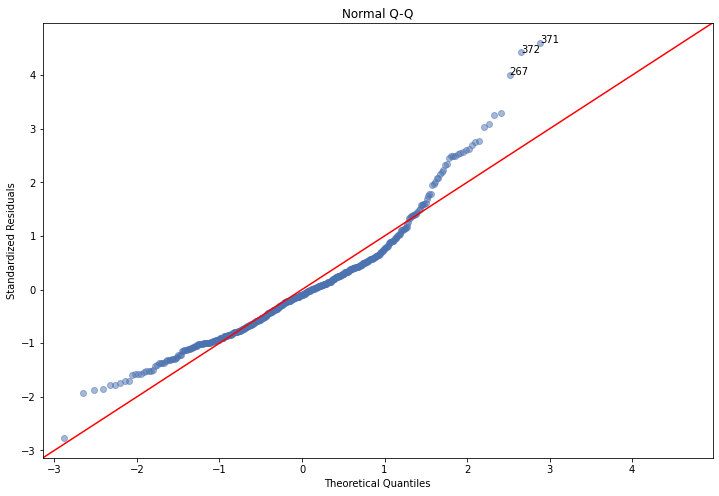

In [14]:
'''
PLOTTING NORMAL Q-Q
'''
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



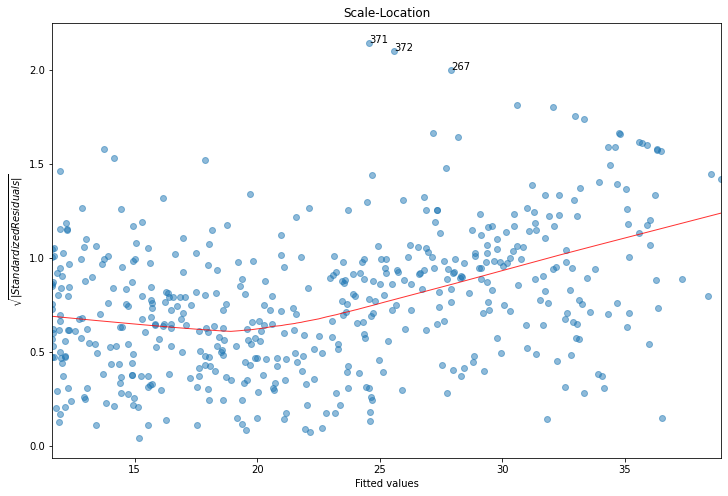

In [15]:
'''
PLOTTING SCALE-LOCATION GRAPH
'''
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



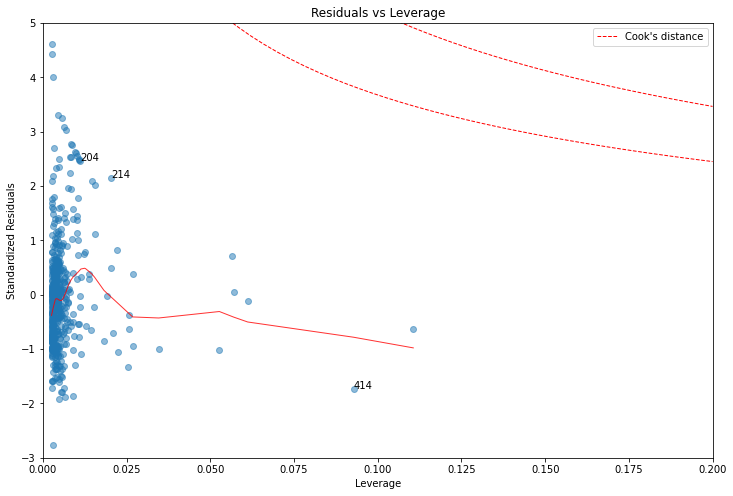

In [16]:
'''
PLOTTING RESIDUALS VS LEVERAGE GRAPH
'''

plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit_2.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');


In [17]:
# Poly(x,n) R function to Python.
def poly(x, p):
    x = np.array(x)
    X = np.transpose(np.vstack((x**k for k in range(p+1))))
    return np.linalg.qr(X)[0][:,1:]

y, X = dmatrices("medv ~ lstat + poly(lstat,5)", data=dataset, return_type='dataframe')

mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          8.73e-122
Time:                        04:03:59   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            34.3399      0.46

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



1.5. Realice los ejercicios correspondientes a predictores cualitativos (3.6.6). Muestre imágenes de la respuesta en consola y redacte sus observaciones y conclusiones acerca de cada ejercicio, así como de las gráficas obtenidas (colocar las imágenes en su reporte).

In [18]:
'''
fix ( Carseats )
names ( Carseats )
'''
dataset = pandas.read_csv("./Carseats.csv")
y, X = dmatrices("Sales ~ Income:Advertising+Price:Age", data=dataset,return_type='dataframe')
model_fit = sm.OLS(y,X).fit()
print(model_fit.summary())


FileNotFoundError: ignored

1.6. Realice los ejercicios correspondientes a la escritura de funciones (3.6.7). Muestre imágenes de la
respuesta en consola y redacte sus observaciones y conclusiones acerca de cada ejercicio, así como
de las gráficas obtenidas (colocar las imágenes en su reporte).

In [ ]:
#library(ISLR)
#library(MASS)

#import ISLR 
#import MASS

#da error, no existen estas librerias

In [19]:
#para simular lo que pasa en R, lo haremos con dos librerias diferentes:

def LoadLibraries():
  import pandas
  import numpy as np
  print ("The libraries have been loaded .")

LoadLibraries()

The libraries have been loaded .
